## EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 120)
train = pd.read_csv("Data/train.csv")
test  = pd.read_csv("Data/test.csv")
train.shape, test.shape, train.head(3)


((1460, 81),
 (1459, 80),
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 
   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
 0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
 1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
 2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
 
   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
 0       Norm     1Fam     2Story            7            5       2003   
 1       Norm     1Fam     1Story            6            8       1976   
 2       Norm     1Fam     2Story            7            5       2001   
 
    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
 0        

In [ ]:
na_rate = train.isna().mean().sort_values(ascending=False)
na_rate.head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Condition2      0.000000
dtype: float64

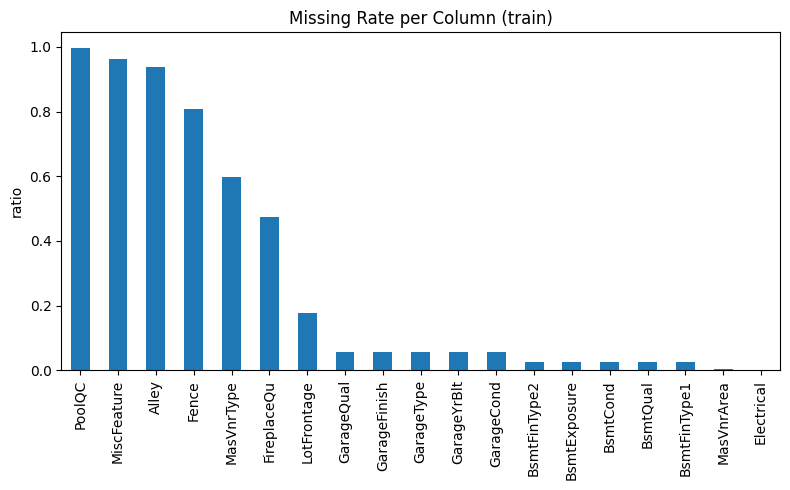

In [6]:
plt.figure(figsize=(8,5))
na_rate[na_rate>0].plot(kind="bar")
plt.title("Missing Rate per Column (train)")
plt.ylabel("ratio")
plt.tight_layout(); plt.show()


In [7]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train.select_dtypes(exclude=[np.number]).columns.tolist()
len(num_cols), len(cat_cols), num_cols[:8], cat_cols[:8]


(38,
 43,
 ['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd'],
 ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope'])

In [8]:
corr = train[num_cols].corr(numeric_only=True)
top = corr["SalePrice"].abs().sort_values(ascending=False).head(15).index
corr.loc[top, top]


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,0.386420
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765,0.239666
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679,0.208171
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789,0.224054
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.564567,0.373066,0.269141,0.296970
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.322445,0.363936,0.339519,0.522396
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.233449,0.344501,0.410531,0.445863
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.484557,0.276833,0.243671,0.058543
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.148112,0.280682,0.326114,0.044316
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.825667,0.315707,0.147716,0.249503


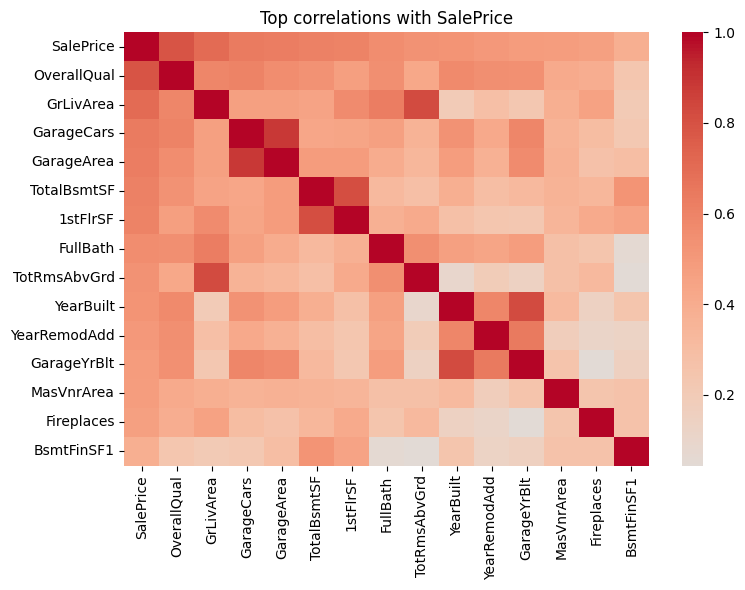

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.loc[top, top], annot=False, cmap="coolwarm", center=0)
plt.title("Top correlations with SalePrice")
plt.tight_layout(); plt.show()


## Data Preprocessing

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
RANDOM_STATE = 42


In [ ]:
train = pd.read_csv("Data/train.csv")  
test  = pd.read_csv("Data/test.csv")
y = np.log1p(train["SalePrice"])
X = train.drop(columns=["SalePrice"])

In [ ]:
if "Id" in X.columns:
    X = X.drop(columns=["Id"])
if "Id" in test.columns:
    test = test.drop(columns=["Id"])
    
X["MSSubClass"] = X["MSSubClass"].astype("category")
test["MSSubClass"] = test["MSSubClass"].astype("category")

### Null values handling

In [ ]:
na_as_none_cols = [
    "Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond",
    "PoolQC","Fence","MiscFeature","MasVnrType"
]
for col in na_as_none_cols:
    if col in X.columns:
        X[col] = X[col].fillna("None")
    if col in test.columns:
        test[col] = test[col].fillna("None")

In [ ]:
qual_order = ["None","Po","Fa","TA","Gd","Ex"]
cond_order = ["None","Po","Fa","TA","Gd","Ex"]  
exp_order  = ["None","No","Mn","Av","Gd"]     
func_order = ["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"]  

ordinal_maps = {
    "ExterQual": qual_order,
    "ExterCond": cond_order,
    "BsmtQual":  qual_order,
    "BsmtCond":  cond_order,
    "BsmtExposure": exp_order,
    "HeatingQC": qual_order,
    "KitchenQual": qual_order,
    "FireplaceQu": qual_order,
    "GarageQual": qual_order,
    "GarageCond": cond_order,
    "PoolQC": qual_order,
    "Fence": ["None","MnWw","GdWo","MnPrv","GdPrv"],  # 栅栏质量（从差到好）
    "Functional": func_order,
}

ordinal_cols = [c for c in ordinal_maps.keys() if c in X.columns]